In [ ]:
# sns.pairplot hue - целевая переменная
# plt.figure(figsize=(15, 5), dpi=300) размер и количество точек на дюйм dots per inch фигуру, потом на нее наносим графики
# sns.heatmap(df.corr(), cmap="vlag" цветовая гамма, annot=True хотим посмотреть значения, fmt="0.2f" сколько знаков после  запятой)

In [ ]:
Домашнее задание 3 (10 баллов)
О задании
В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных: https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей. Также по каждому графику ожидается небольшой комментарий с выводами.

Функции, которые могут пригодиться при оформлении графиков: .show(), .title(), .xlabel(), .ylabel()

In [5]:
import pandas as pd

In [ ]:
Задание 1 (0.0 балла)
Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [12]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv",
    sep=",",
)
data.head() # Первые пять строк

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [13]:
data.tail() # Последние пять строк

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [69]:
print('Размер датафрейма', data.shape)

Размер датафрейма (1000, 21)


In [70]:
Задание 2 (0.5 балла)
Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

SyntaxError: invalid syntax (1332898801.py, line 1)

In [71]:
if data.isnull().values.any() == False:
    print('Пропущенных значений нет')
else:
    print('Есть пропущенные значения')

Пропущенных значений нет


In [363]:
quantitative = data[['duration', 'amount', 'age']]
categorical = data[['status', 'credit_history', 'purpose', 'savings', 'property',
                    'housing', 'job', 'purpose', 'personal_status_sex', 'other_debtors',
                    'other_installment_plans']]
ordinal = data[['employment_duration', 'people_liable', 'installment_rate', 'present_residence', 
                'number_credits']]
binary = data[['telephone', 'foreign_worker', 'credit_risk']]

In [ ]:
Задание 3 (0.5 балла)
Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [87]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

In [ ]:
Задание 4 (0.5 балла)
Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [117]:
percantage1 = ((data.age < 30) & (data.housing == 'rent')).sum()/((data.age < 30).sum())*100
percantage2 = ((data.age > 40) & (data.housing == 'rent')).sum()/((data.age > 40).sum())*100
print('Доля клиентов моложе 30 лет, снимающих жилье равна', round(percantage1, 3), "% , а старше 40 лет, снимающих жилье, равна", round(percantage2, 3), '%')
data.number_credits.value_counts()

Доля клиентов моложе 30 лет, снимающих жилье равна 66.667 % , а старше 40 лет, снимающих жилье, равна 68.015 %


1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

In [ ]:
Задание 5 (0.5 балла)
У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [129]:
number_frn_many_credits = ((data.foreign_worker == 'yes') & ((data.number_credits == '>= 6') | (data.number_credits == '4-5'))).sum()
print('Число иностранцев с более, чем 3 кредита равно', number_frn_many_credits)

Число иностранцев с более, чем 3 кредита равно 1


In [ ]:
Задание 6 (1 балл)

In [131]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Используя numpy и matplotlib, начнём с тренировки: постройте график функций Sin и Cos от -Пи до Пи из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

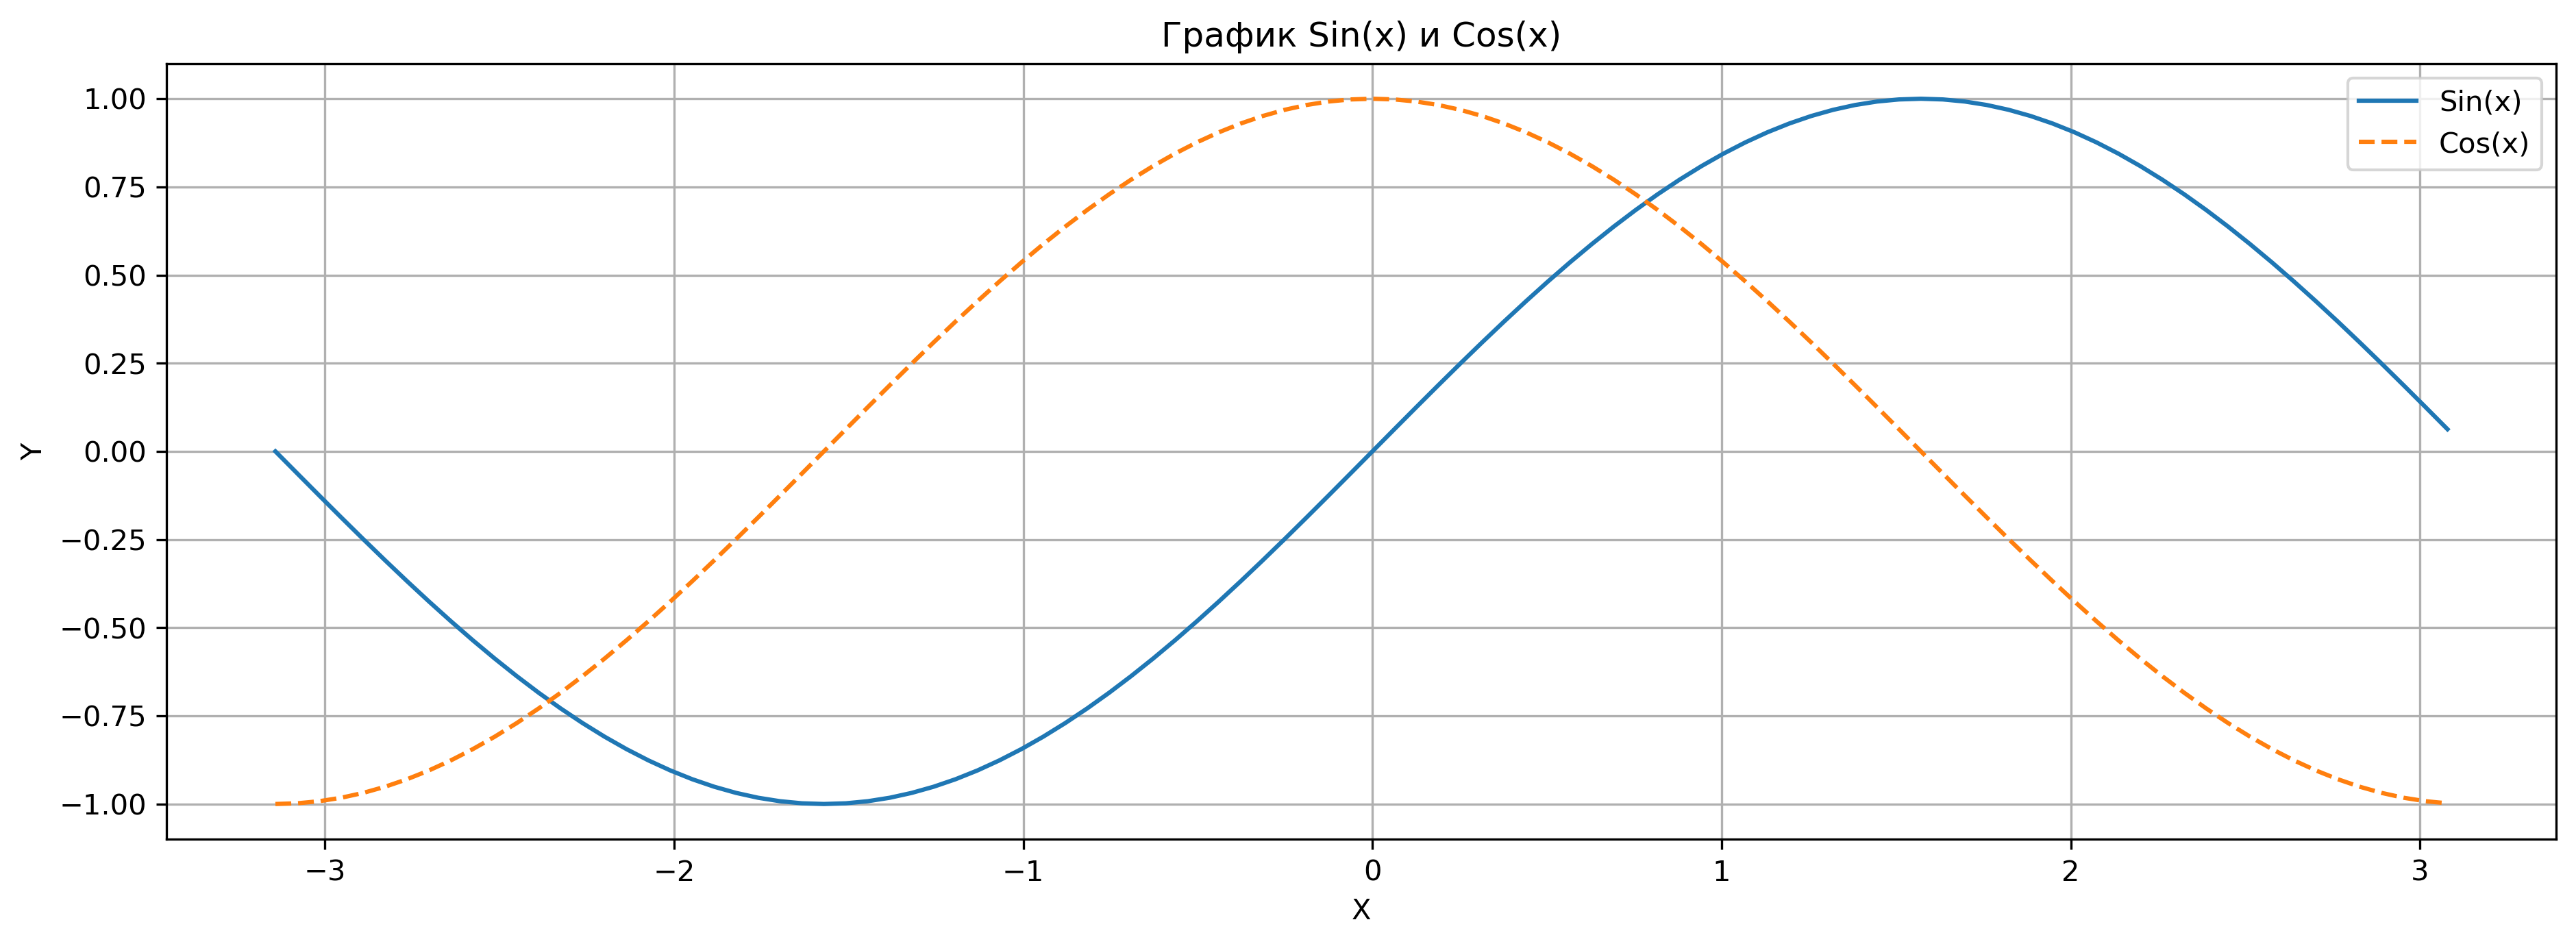

In [202]:
plt.figure(figsize=(15, 5), dpi=300)
plt.title("График Sin(x) и Cos(x)")
plt.xlabel('X')
plt.ylabel('Y')
x = np.arange(-np.pi, np.pi, 2*np.pi/100)
y = np.sin(x)
plt.plot(x, y, label = "Sin(x)")
z = np.cos(x)
plt.plot(x, z, label = "Cos(x)", linestyle = "dashed")
plt.grid()
plt.legend()
plt.show()

In [ ]:
Задание 7 (1 балл)
Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

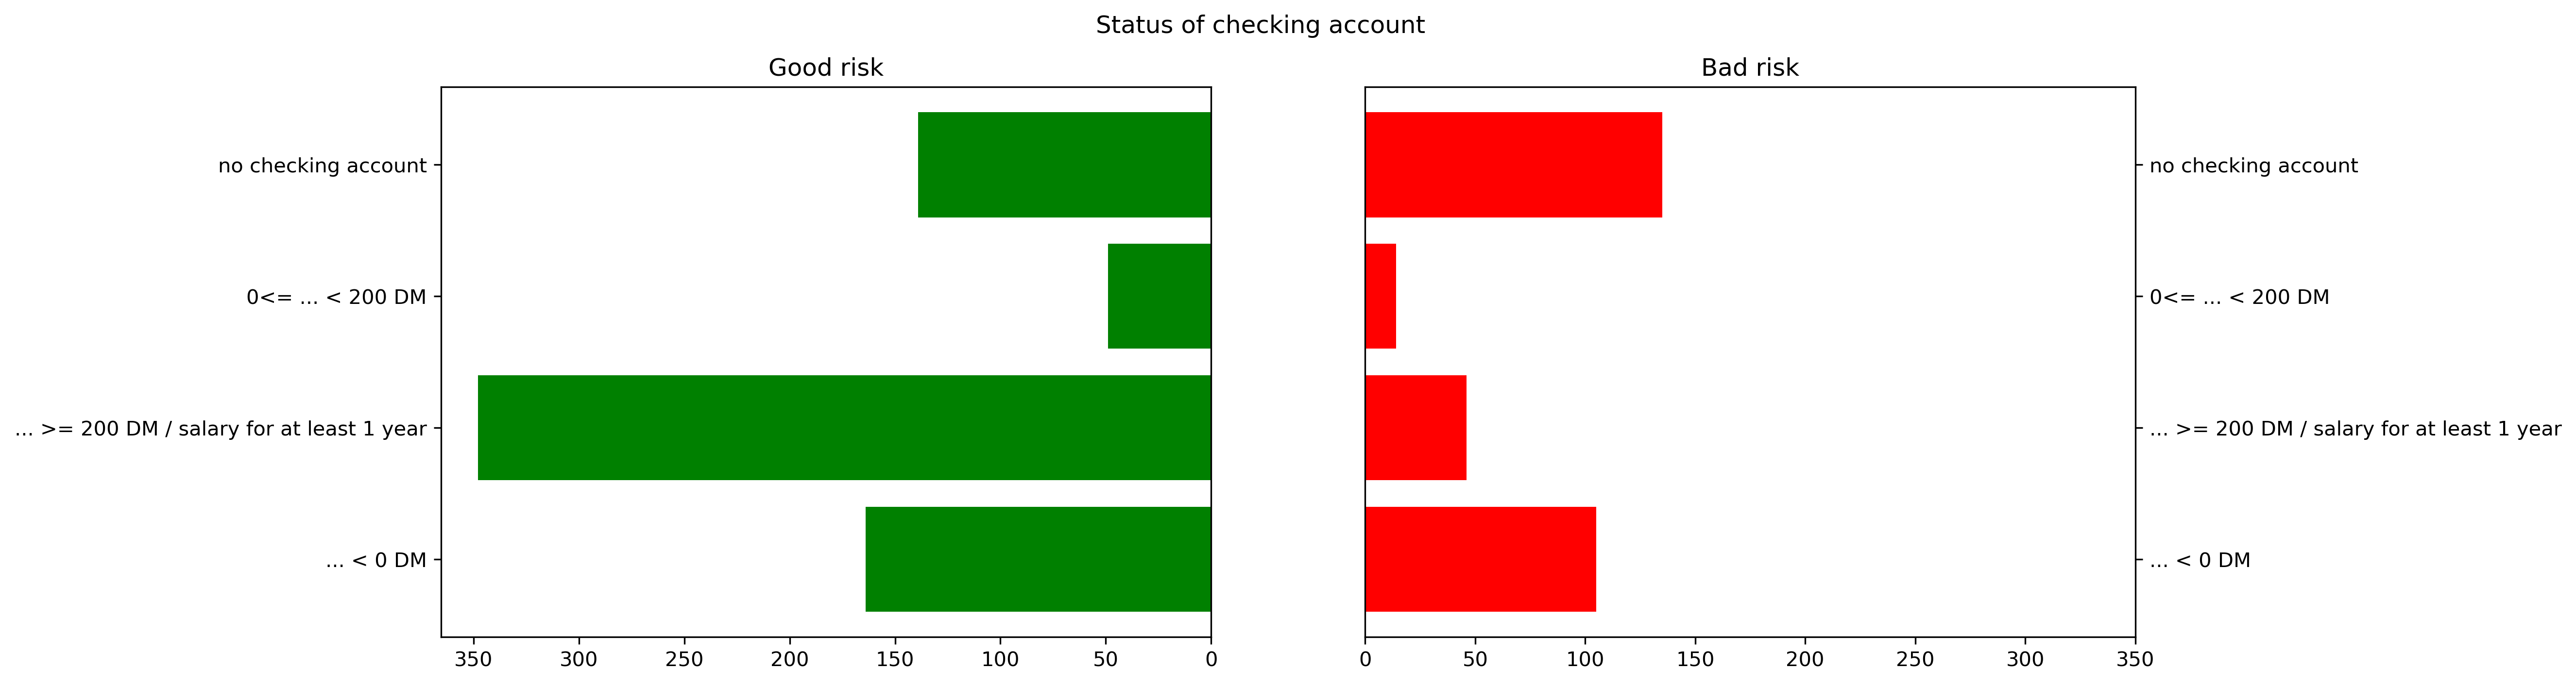


                                       status credit_risk  count
0                                  ... < 0 DM        good    164
2  ... >= 200 DM / salary for at least 1 year        good    348
4                            0<= ... < 200 DM        good     49
6                         no checking account        good    139


In [341]:
graph, (plot1, plot2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300) # Создали пространство и добавили в него два графика (в одной строке два графика - столбца)
graph.suptitle('Status of checking account')
x = ['... < 0 DM', '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM', 'no checking account'] # Нанесли на ось уникальные значения столбика статусов
a = data.groupby("status", as_index =False)["credit_risk"].value_counts()
y1 = a[a['credit_risk']=='good']['count']
plot1.barh(x, y1, color = 'green')
plot1.invert_xaxis()
plot1.set_title('Good risk')
y2 = a[a['credit_risk']=='bad']['count']
plot2.barh(x, y2, color = 'red')
plot2.yaxis.tick_right()
plot2.set_title('Bad risk')
plot2.set_xlim([0, 350])
plt.show()
print('')
print(a[a['credit_risk']=='good'])
print('В целом значения по уровню риска для людей соответствующего статуса совпадают, за исключением случая, когда у человека >= 200 DM/salary for at least 1 year - для категории этих лиц людей с хорошим риском гораздо больше, чем с плохим, потому что они зарабатывают больше и в состоянии платить за свои кредиты, предположительно, потому что кредиты не составляют большую часть их расходов и риски, что состоятельные люди не заплатят, меньше')

In [ ]:
Задание 8 (0.5 балла)

In [343]:
import seaborn as sns

In [ ]:
Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

Мы видим, что  у людей с неизвестным балансом сберегательного счета или не имеющих сберегательный счет больше людей, способных платить кредит до погашения, однако, так же много людей с повышенным риском неоплаты задолженности. Количество людей, имеющих сбережения и способных платить чуть больше тех, кто не сможет расплатиться. Для людей со сбережениями >= 1000 DM число людей, способных заплатить в пять-шесть раз превосходит не способных платить с таким объемом сбережений.


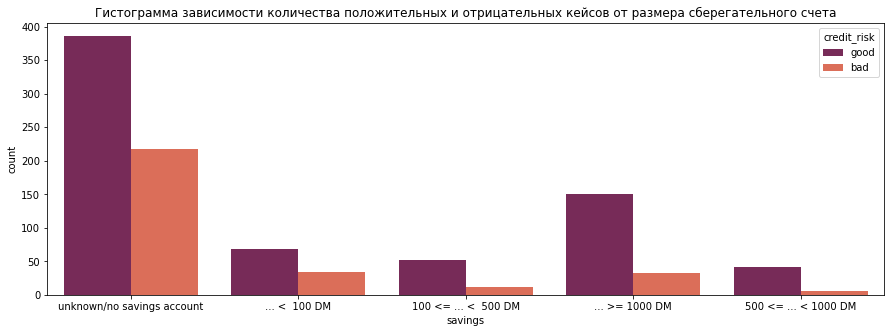

In [350]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='savings', hue='credit_risk', data=data, palette = "rocket")
plt.title('Гистограмма зависимости количества положительных и отрицательных кейсов от размера сберегательного счета')
print('Мы видим, что  у людей с неизвестным балансом сберегательного счета или не имеющих сберегательный счет больше людей, способных платить кредит до погашения, однако, так же много людей с повышенным риском неоплаты задолженности. Количество людей, имеющих сбережения и способных платить чуть больше тех, кто не сможет расплатиться. Для людей со сбережениями >= 1000 DM число людей, способных заплатить в пять-шесть раз превосходит не способных платить с таким объемом сбережений.')

In [ ]:
Задание 9 (1 балл)

In [ ]:
seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

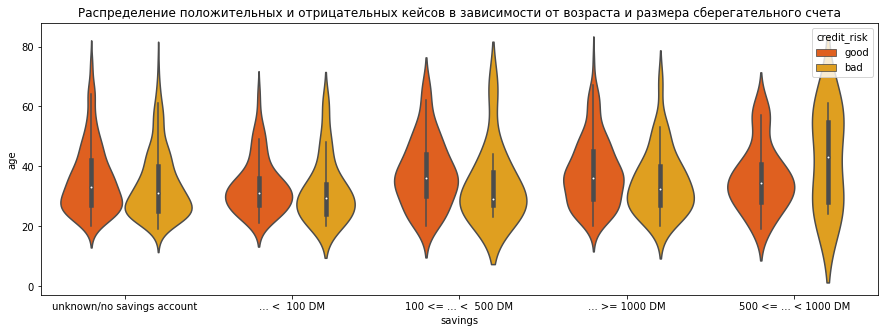

In [357]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette='autumn')
plt.title('Распределение положительных и отрицательных кейсов в зависимости от возраста и размера сберегательного счета');